<a href="https://colab.research.google.com/github/shubh-chokhani/Random-Allocator-for-a-creative-writing-competition/blob/main/AppleOrange.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries 

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
import os
from skimage.io import imread
from skimage.transform import resize
import numpy as np
from sklearn.model_selection import train_test_split

# Preparing the data

In [12]:
input_dir='/content/drive/MyDrive/fruits'
categories=['apple','orange']

data=[]
labels=[]
for category_index, category in enumerate(categories):
  for file in os.listdir(os.path.join(input_dir,category)):
    img_path=os.path.join(input_dir,category,file)
    img=imread(img_path)
    img=resize(img,(15,15))
    data.append(img.flatten())
    labels.append(category_index)
data = np.asarray(data)
labels = np.asarray(labels)

/usr/local/lib/python3.9/dist-packages/PIL/TiffImagePlugin.py:625: UserWarning: Metadata Warning, tag 33723 had too many entries: 2, expected 1
  warnings.warn(



# Splitting the dataset



In [13]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, shuffle=True, stratify=labels)



# Training the classifier

In [14]:
from sklearn.ensemble import RandomForestClassifier
classifier= RandomForestClassifier(n_estimators=100, criterion='entropy')
classifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy')

# Predicting the test set results

In [15]:
y_pred = classifier.predict(X_test)

# Evaluating the performance

In [16]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred)*100)

89.72332015810277


Pridicted class :  apple


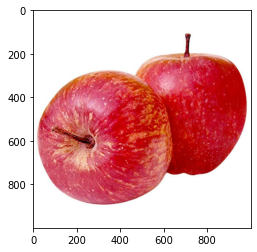

In [17]:
import matplotlib.pyplot as plt
up_img = imread('apple.jpg')
plt.imshow(up_img)
up_img = resize(up_img,(15,15))
ui = []
ui.append(up_img.flatten())
pred = classifier.predict(np.asarray(ui))
print("Pridicted class : ",categories[pred[0]])